# Seebeck Coefficients Modelling
for bilayer graphene (2D), quantum point contacts (1D), and quantum dots (0D)

In [1]:
from scipy import constants, signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
pi = constants.pi
m_e = constants.m_e
k_b = constants.k
h = constants.h 
hbar = constants.hbar
e = constants.e
epsilon_0 = constants.epsilon_0

hbar_ev = hbar/e
gamma1 = 0.4 #eV
Vf0 = 1e6 # charge mobility
er = 3.6 #dielectric constant
tbg = 20e-9 # back gate
W = 50e-9 # width of the 1D structure

In [2]:
def dRdu(R):
    """
    Parameters:
    -----------
    R: array
        Values of resistances.
    
    Returns:
    --------
    derivative: array
        The numerical derivative of R, logarithmically transformed.
    """
    log = np.log(R)
    derivative = np.gradient(log)
    return derivative
    
def Mott(f, T):
    """
    Mott formula to calculate the Seebeck coefficient
    
    Parameters:
    -----------
    f: array
        The numerical derivative of log(R).
    T: array
        The temperature range for the Seebeck coefficient.
        
    Returns:
    --------
    mott: array
        An array with Seebeck coefficients for different temperature values.
    """
    mott = pi**2 * k_b**2 * T / (3*e) * f
    return mott

def EfBLG(Vg, Vg0):
    """
    Models Fermi energy for 2D materials for a given series of voltages
    
    Parameters:
    -----------
    Vg: array
        Applied top gate voltages. 
    Vg0: float
        Symmetric voltage Vg0.
    
    Returns:
    --------
    Ef: array
        Fermi energy for the 2D material (Bilayer Graphene).
    R: array
        Resistance for the 2D material, given a series of top gate voltages.
    """
    n = epsilon_0*er*(Vg-Vg0)/(e*tbg)
    alpha = 1/(pi*hbar_ev**2*Vf0**2)
    n0 = epsilon_0*er*(0.5-Vg0)/(e*tbg)
    n_eff = np.sqrt(n**2 + n0**2)    
    Ef = np.sign(n)*0.5*(-gamma1+np.sqrt(gamma1**2+4*np.abs(n_eff)/alpha)) # conductance band 
    R = 1/(n_eff*e*Vf0)
    return Ef, R

# for 1D
def r_QPC(Vg):
    """
    Calculates the conductance of QPC.
    
    Parameters:
    -----------
    Vg: array
        Applied top gate voltages.
    Returns:
    --------
    R: array
        Resistance for the 1D material (Quantum point contact), given a series of top gate voltages.
    """
    Vg0=0
    m_star = gamma1/(2*Vf0**2) # band structure, all parabollic
    n = epsilon_0*er*(Vg-Vg0)/(e*tbg)
    alpha = 1/(pi*hbar_ev**2*Vf0**2)
    Ef = np.sign(n)*0.5*(-gamma1+np.sqrt(gamma1**2+4*np.abs(n)/alpha))
    N = np.round(np.sqrt(2*np.abs(Ef)*m_star)*W/(pi*hbar_ev))
    sigma = 4*e**2*N/h
    resistance = 1/sigma
    return resistance

# for 0D
def QD(x, x0, gamma, scaling):
    """
    Define a series of Lorentzian peaks to simulate the 0D behavior.
    
    Parameters:
    ----------
    x : array
        range of points on the x-axis, independent variable
    x0 : list
        the centers of the Lorentzian peak
    scaling : float
        Some scaling factor
    """
    return scaling/pi * (0.5*gamma / ((x-x0)**2 + (0.5*gamma)**2))

# 2D: E$_F$ and R

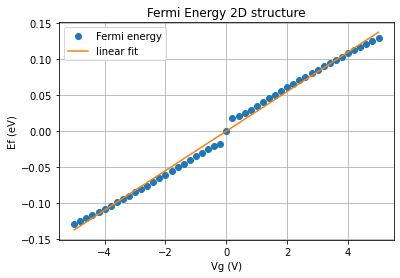

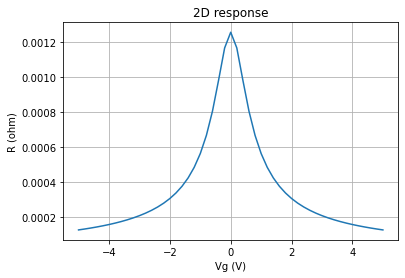

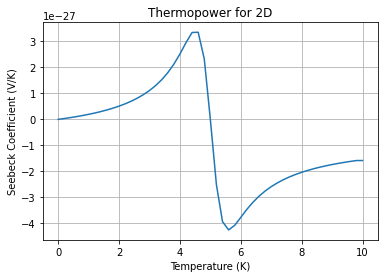

In [3]:
Vg = np.linspace(-5,5,51)
Ef, R = EfBLG(Vg, 0)

plt.plot(Vg, Ef,'o', label = 'Fermi energy')
p = np.polyfit(Vg, Ef,1)
poly = np.poly1d(p)
plt.plot(Vg, poly(Vg), label = 'linear fit')
plt.ylabel('Ef (eV)')
plt.xlabel('Vg (V)')
plt.grid()
plt.legend()
plt.title('Fermi Energy 2D structure')
plt.show()
plt.close()


plt.plot(Vg, R)
plt.ylabel('R (ohm)')
plt.xlabel('Vg (V)')
plt.grid()
plt.title('2D response')
plt.show()
plt.close()

T = np.linspace(0,10,51)
der_2D = dRdu(R)
mott = Mott(der_2D,T)
plt.plot(T, mott)
plt.title("Thermopower for 2D")
plt.xlabel("Temperature (K)")
plt.ylabel("Seebeck Coefficient (V/K)")
plt.grid()
plt.show()
plt.close()

# 1D: R vs V$_G$

<ipython-input-2-db65cf3f920d>:83: RuntimeWarning: divide by zero encountered in true_divide
  resistance = 1/sigma


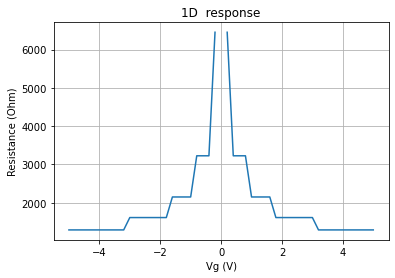

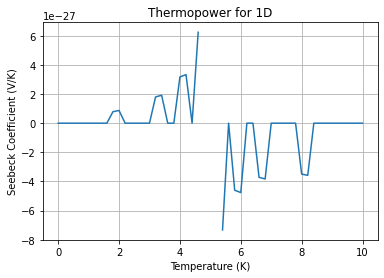

In [4]:
Vg = np.linspace(-5,5,51)
resistance = r_QPC(Vg)  
plt.plot(Vg, resistance)
plt.title("1D  response")
plt.xlabel("Vg (V)")
plt.ylabel("Resistance (Ohm)")
plt.grid()
plt.show()
plt.close()

T = np.linspace(0,10,51)
res = dRdu(resistance)
mott = Mott(res,T)
plt.plot(T, mott)
plt.title("Thermopower for 1D")
plt.xlabel("Temperature (K)")
plt.ylabel("Seebeck Coefficient (V/K)")
plt.grid()
plt.show()
plt.close()

# 0D: R vs V$_G$

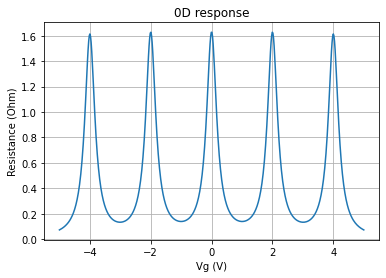

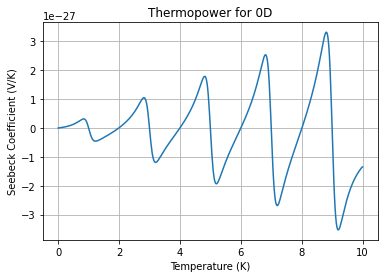

In [5]:
# 0D figure
Vg = np.linspace(-5,5,500)
peaks=0
centers = [-4, -2, 0, 2, 4]

for i in centers:
    peaks += QD(Vg, i, 0.4, 1)
    
plt.plot(Vg, peaks)
plt.title("0D response")
plt.xlabel("Vg (V)")
plt.ylabel("Resistance (Ohm)")
plt.grid()
plt.show()
plt.close()


T = np.linspace(0,10,500)
der_0D = dRdu(peaks)
mott = Mott(der_0D,T)
plt.plot(T, mott)
plt.title("Thermopower for 0D")
plt.xlabel("Temperature (K)")
plt.ylabel("Seebeck Coefficient (V/K)")
plt.grid()
plt.show()
plt.close()